**Data Exploration and Preprocessing**

In [ ]:
pip install -U ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 40.4 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=5d86a250a3f3f470d74f19a66a44d1c6110b975c844a11856779fe4107e16822
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible

In [ ]:
!pip install --force-reinstall pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [ ]:
import pandas as pd
df = pd.read_csv('/content/adult_with_headers.csv')
summary_stats = df.describe(include ='all')
missing_values = df.isnull().sum()
data_types = df.dtypes
print(summary_stats)
print(missing_values)
print(data_types)

                 age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 32561            32561   

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = ['age', 'fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
numerical_data = df[numerical_cols]

#Apply Standard Scaling
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(numerical_data)
standard_scaled_df = pd.DataFrame(standard_scaled, columns=[f"{col}_std" for col in numerical_cols])

#Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(numerical_data)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=[f"{col}_minmax" for col in numerical_cols])

standard_scaled_df.head(), min_max_scaled_df.head()


(    age_std  fnlwgt_std  education_num_std  capital_gain_std  \
 0  0.033015   -1.068560           1.136803          0.154274   
 1  0.840494   -1.013600           1.136803         -0.144314   
 2 -0.040392    0.241469          -0.425930         -0.144314   
 3  1.060716    0.422377          -1.207297         -0.144314   
 4 -0.774463    1.405756           1.136803         -0.144314   
 
    capital_loss_std  hours_per_week_std  
 0         -0.218051           -0.033763  
 1         -0.218051           -2.233521  
 2         -0.218051           -0.033763  
 3         -0.218051           -0.033763  
 4         -0.218051           -0.033763  ,
    age_minmax  fnlwgt_minmax  education_num_minmax  capital_gain_minmax  \
 0    0.301370       0.044302              0.800000              0.02174   
 1    0.452055       0.048238              0.800000              0.00000   
 2    0.287671       0.138113              0.533333              0.00000   
 3    0.493151       0.151068              0.

**When to use each scaling technique**

*   **Standard Scaling:** When features are normally distributed or when using algorithms like SVM, Logistic Regression or K-means that assume a Gaussian distribution.

*   **Min-Max Scaling:** When you need all features on the sampe scale(0-1), especially for neural networks or algorithm sensitive to absolute magnitude like KNN.



**Encoding Techniques**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income') #Target Variable, keep aside for now

low_cardinality = [col for col in categorical_cols if df[col].nunique() < 5]
high_cardinality = [col for col in categorical_cols if df[col].nunique() >= 5]

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[low_cardinality])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(low_cardinality))

label_encoded_df = df[high_cardinality].apply(LabelEncoder().fit_transform)
encoded_df = pd.concat([onehot_encoded_df, label_encoded_df], axis=1)
encoded_df.head()

,sex_ Male,sex_nan,workclass,education,marital_status,occupation,relationship,race,native_country
0,1.0,0.0,7,9,4,1,1,4,38
1,1.0,0.0,6,9,2,4,0,4,38
2,1.0,0.0,4,11,0,6,1,4,38
3,1.0,0.0,4,1,2,6,0,2,38
4,0.0,0.0,4,9,2,10,5,2,5


**One-Hot Encoding vs. Label Encoding**

*   One-Hot Encoding

1.   Creates binary columns for each category
2.   For low-cardinality categorical data
3. No ordinal assumptions; model-agnostic
4. Increase dimensionality


*   Label Encoding

1.   Converts categories to integer
2.   For high-cardinality data or tree-based models
3. Memory efficient; fast computation
4. May mislead models into thinking there's an order




**Feature Engineering**

In [ ]:
#Feature 1: Age Group - categorize age into bins
df['age_group'] = pd.cut(df['age'], bins=[16, 25, 45, 65, 90], labels=['Young', 'Adult','Middle-aged','Senior'])

#Feature 2: Net capital - combine capital gain and loss
df['net_capital'] = df['capital_gain'] - df['capital_loss']

#Display the new features
df[['age','age_group','capital_gain','capital_loss','net_capital']].head()

,age,age_group,capital_gain,capital_loss,net_capital
0,39,Adult,2174.0,0.0,2174.0
1,50,Middle-aged,0.0,0.0,0.0
2,38,Adult,0.0,0.0,0.0
3,53,Middle-aged,0.0,0.0,0.0
4,28,Adult,0.0,0.0,0.0


**1. age_group**

* Categorical (Young, Adult, Middle-aged, SEnior)
*  Rationale - Captures age-related life stages, which may influence income and employment patterns more meaningfully than raw age.

**2. net_capital**

*  Numeric (calculated as capital_gain - capital_loss)
*  Rationale - Consolidate two related financial features into a single net value representing financial advantage/disadvantage, which may better correlate with income class.

Skewness before transformation: 11.953847687699799
Skewness after transformation: 3.096143524467517


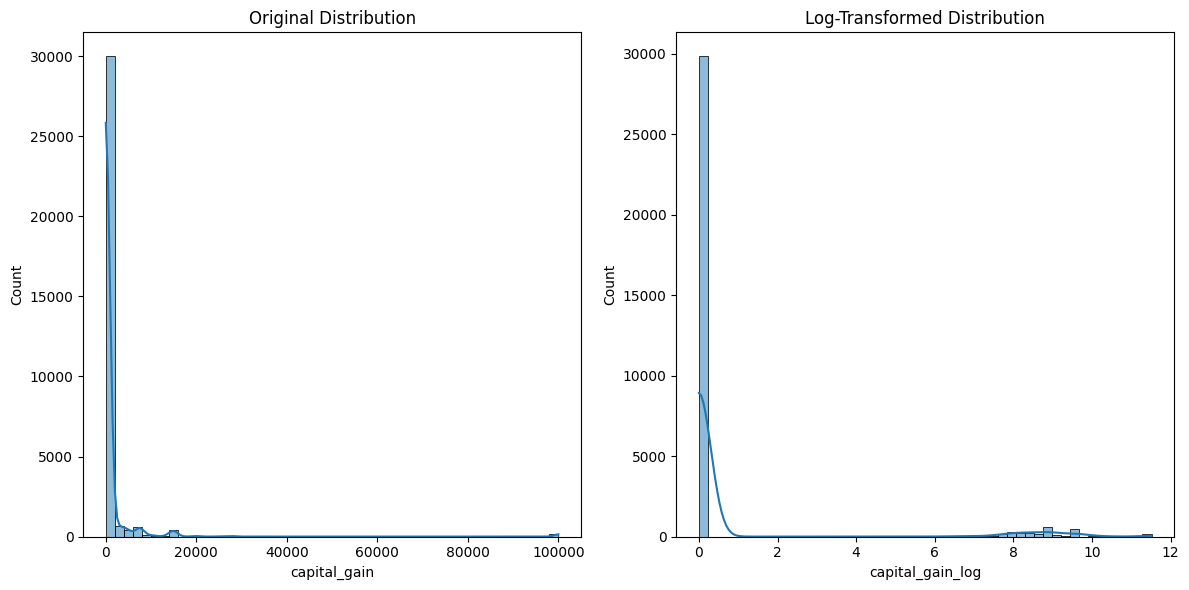

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness before transformation:", df['capital_gain'].skew())

#Apply log(1 + x) transformation
df['capital_gain_log'] = np.log1p(df['capital_gain'])

print("Skewness after transformation:", df['capital_gain_log'].skew())

plt.figure(figsize=(12,6))

#Original
plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], bins=50, kde=True)
plt.title('Original Distribution')

#Transformed
plt.subplot(1,2,2)
sns.histplot(df['capital_gain_log'], bins=50, kde=True)
plt.title('Log-Transformed Distribution')

plt.tight_layout()
plt.show()

**Selected Feature:** capital_gain

* From earlier analysis, capital_gain had a skewness of 111.95, which is extremely right-skewed.
* This skewness can distort model performance, especially for linear models, because most values are concentrated near zero, while a few extreme values dominate the feature range.
* Improves model training by making data more linear and reducing the impact of outliers.

**Feature Selection**

In [ ]:
from sklearn.ensemble import IsolationForest
numerical_cols = ['age', 'fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

#Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso_forest.fit_predict(df[numerical_cols])

#Add outlier flag to df
df['outlier'] = outlier_flags

#-1 means outlier, 1 means inlier
print("Original dataset shape:", df.shape)

#Remove Outliers
df_cleaned = df[df['outlier'] == 1].drop(columns='outlier')
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (17923, 19)
Cleaned dataset shape: (17743, 18)


**Outliers can affect model performance.**

* Disort Model Parameters: Skew regression coefficients and weights.
* Cause Overfitting: Model may learn noise instead of patterns.
* Reduce Accuracy: Inflate error metrics like MSE/MAE.
* Hide True Patterns: Mask real feature relationship.

In [ ]:
import ppscore as pps
pps_matrix = pps.matrix(df)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

In [ ]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.001219,classification,True,weighted F1,0.578564,0.579078,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,77109.112400,78472.353558,DecisionTreeRegressor()
3,age,education,0.042997,classification,True,weighted F1,0.197400,0.231909,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.848400,1.879352,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
356,outlier,income,0.051688,classification,True,weighted F1,0.660159,0.677724,DecisionTreeClassifier()
357,outlier,age_group,0.000000,classification,True,weighted F1,0.367000,0.346485,DecisionTreeClassifier()
358,outlier,net_capital,0.000000,regression,True,mean absolute error,1161.985000,1591.926554,DecisionTreeRegressor()
359,outlier,capital_gain_log,0.000000,regression,True,mean absolute error,0.766051,1.335661,DecisionTreeRegressor()


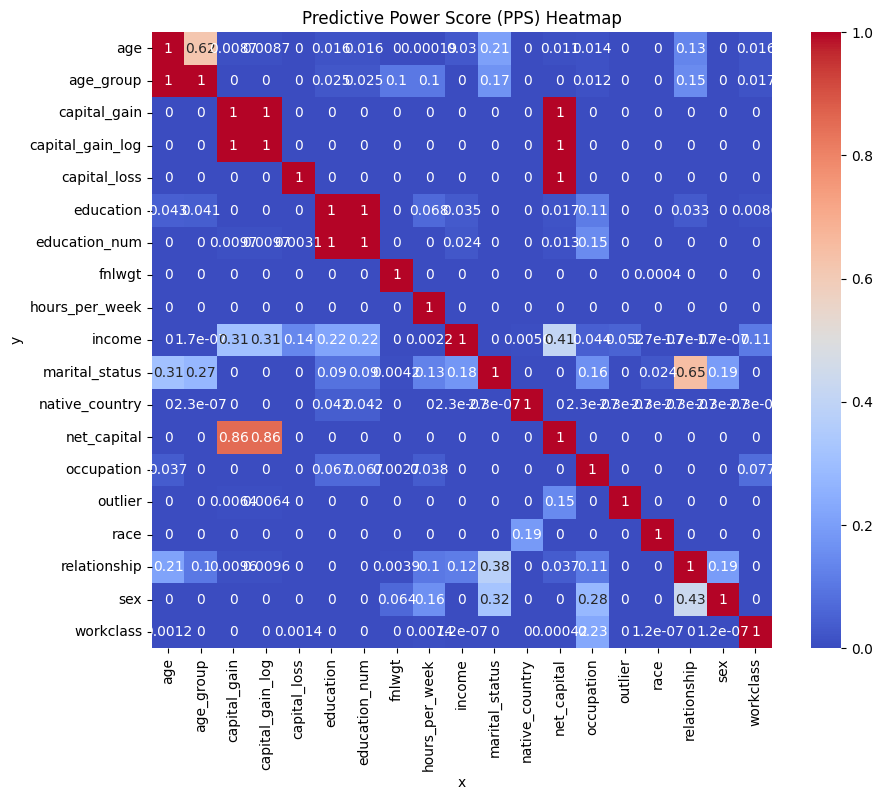

In [ ]:
pps_matrix_pivot = pps_matrix.pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(10,8))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm')
plt.title('Predictive Power Score (PPS) Heatmap')
plt.show()

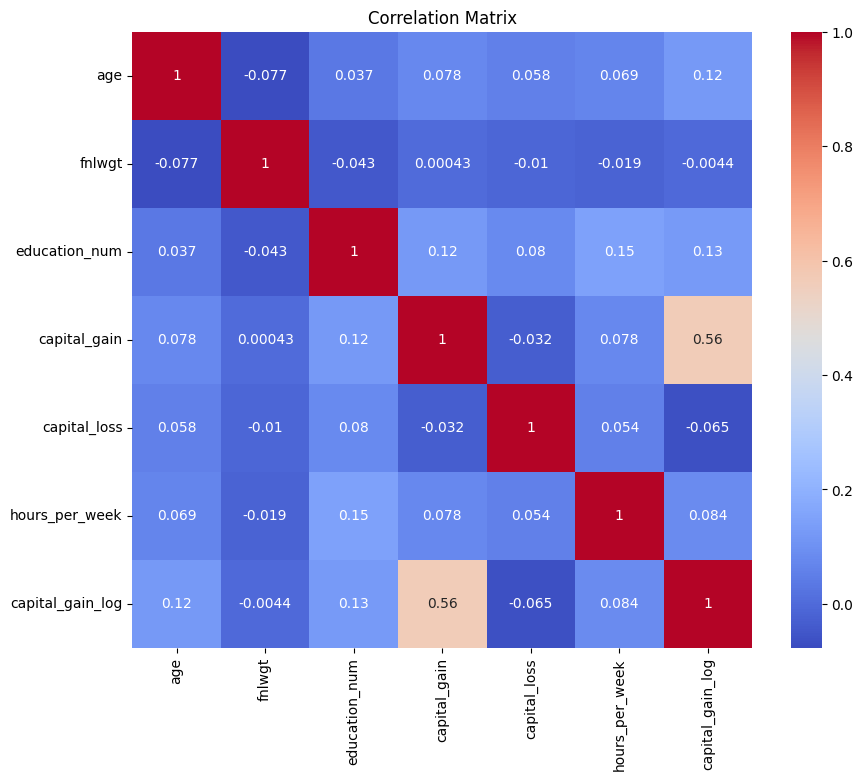

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()